# SKlearn
Documentation : https://scikit-learn.org/stable/

#### Sommaire :
* [1](#1) : Apprentissage Supervisé 
    * [1.1](#1.1) : Régression
    * [1.2](#1.2) : Classification
* [2](#2) : Sélection de modèles
    * [2.1](#2.1) : Train Test Split
    * [2.2](#2.2) : Validation Set et Cross Validation
    * [2.3](#2.3) : Validation Curve
    * [2.4](#2.4) : GridSearchCV
    * [2.5](#2.5) : Confusion Matrix
    * [2.6](#2.6) : Learning curve
* [3](#3) : Preprocessing 
    * [3.1](#3.1) : Encodage
    * [3.2](#3.2) : Normalisation
    * [3.3](#3.3) : Polynomial Features
    * [3.4](#3.4) : Discretisation
* [4](#4) : Pipelines
    * [4.1](#4.1) : Pipelines basiques
    * [4.2](#4.2) : Pipelines et cross validation
    * [4.3](#4.3) : Pipelines avancés
* [5](#5) : Feature selection
    * [5.1](#5.1) : Variance Threshold
    * [5.2](#5.2) : SelectKBest
    * [5.3](#5.3) : Recursive feature Elimination
    * [5.4](#5.4) : SelectFromModel
* [6](#6) : Apprentissage Non-Supervisé
    * [6.1](#6.1) : K-Means Clustering
    * [6.2](#6.2) : Detection d'anomalies avec Isolation Forest
    * [6.3](#6.3) : PCA : Reduction de dimension
* [7](#7) : Ensemble Learning
    * [7.1](#7.1) : Voting Classifier
    * [7.2](#7.2) : Bagging
    * [7.3](#7.3) : Boosting
    * [7.4](#7.4) : Stacking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

**SKlearn** utilise la même syntaxe pour toutes ces fonctions : **model = constructeur(hyperparamètres)**. Une fois le modèle initialisé, on effectue 3 méthodes : 
* **model.fit**(X, y) : on entraine le modèle sur des données X et y. X et y étant deux tableaux numpy de dimensions 2.
* **model.score**(X, y) : evaluation du modèle.
* **model.predict**(X) : Une fois le score satisfaisant, le modèle est près à faire de nouvelles prédictions. 

# 1. Apprentisage supervisé <a class="anchor" id="1"></a>
### 1.1. Régression <a class="anchor" id="1.1"></a>
#### 1.1.1 Régréssion linéaire

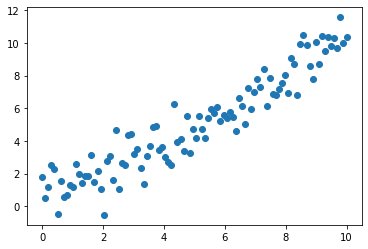

In [2]:
# Création d'un dataset linéaire
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1) # on ajoute bien la seconde dimension au vecteur colonne.
y = X + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

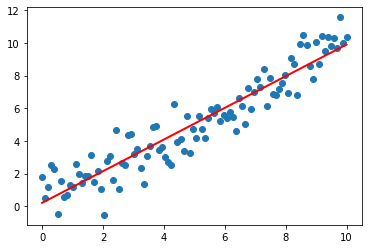

In [4]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y) # correspond au R²

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c="r", lw="2")
plt.show()

#### 1.1.2 Régression avec la méthode Support Vector Machine (SVM)

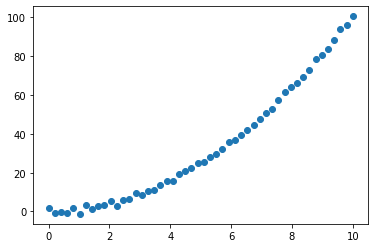

In [5]:
# Création d'un dataset non linéaire
np.random.seed(1)
m = 50 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1) # on ajoute bien la seconde dimension au vecteur colonne.
y = X**2 + np.random.randn(m, 1)
y = np.ravel(y) # Ici y doit avoir une seule dimension 

plt.scatter(X, y)
plt.show()

In [6]:
from sklearn.svm import SVR

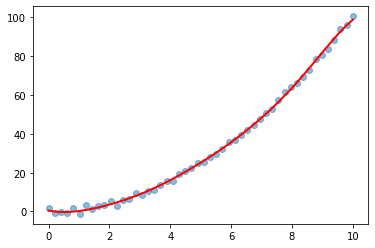

In [7]:
model = SVR(C=100)
model.fit(X, y)
model.score(X, y) 

predictions = model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, c="r", lw="2")
plt.show()

### 1.2. Classification <a class="anchor" id="1.2"></a>

In [8]:
# imprtation d'un dataset
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors = 4)

In [11]:
# Comme pandas fonctionne sur la base de numpy, on peut travailler directement sur des dataframes.
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [12]:
model.fit(X, y) # entrainement du modele
score = model.score(X, y) # évaluation
prediction = model.predict(X) # prediction

print(score)

0.8403361344537815


##### Exemple d'utilisation du modèle de classification :

In [13]:
# A partir du modèle et de la base de données, déterminons les chances de survie aux nauffrage du titanic
def survie(model, pclass=3, sex=0, age=21):
  x = np.array([pclass, sex, age]).reshape(1, 3) # On remplace X par les données à tester
  print(model.predict(x))
  print(model.predict_proba(x))

In [14]:
survie(model)

[0]
[[0.75 0.25]]


# 2. Sélection de modèles <a class="anchor" id="2"></a>
En machine learning, il ne faut jamais tester son modèle sur les données qui ont servies à son entrainement. Il faut donc séparer le dataset initial en deux : un **train set** (réservé à l'entrainement du modèle) et un **test set**, (réservé à l'évaluation du modèle). En général on met 80% des données dans le train set, et 20% dans le test set.
### 2.1. Train Test Split <a class="anchor" id="2.1"></a>
* **train_test_split**() : divise les données du dataset en train set et test set.
    * **test_size**=... : pourcentage de données à mettre dans le test set.
    * **random_state**=... : fixe l'aléatoire de la répartition entre les sets.

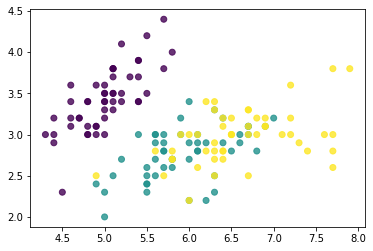

In [15]:
# Chargement du dataset iris.
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

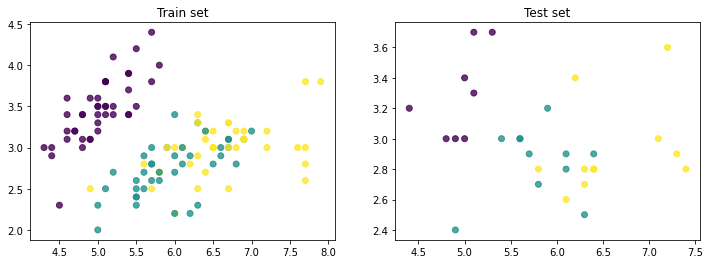

In [18]:
# Visualisation du train set et du test set
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# Démonstration avec un KNeighborsClassifier :

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.9


### 2.2. Validation Set et Cross Validation <a class="anchor" id="2.2"></a>
Le but est maintenant de régler les hyperparamètres du modèle pour optimiser le score. La recherche des paramètres idéals ne doit pas se faire sur le train set ou le test set, on découpe donc une troisième partie dans notre dataset initial, le **val set**.

La **cross validation** entraine le modèle sur plusieurs découpes du train set, pour éviter que celui-ci soit biasé par la manière dont les observations sont tirés. Il existe plusieurs façon de faire de la cross validation, nous allons ici nous intérrésé au Kfold :
* **cross_val_score**(): effectue la cross validation.
    * **cv**=... : nombre de splits dans la cross validation. 

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# On obtient 5 scores, un par split de cross validation

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

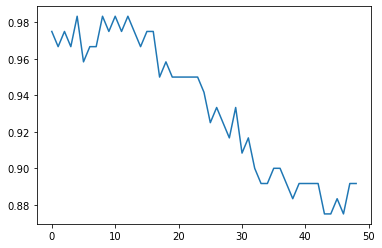

In [23]:
# On crée une boucle pour faire varier les hyperparamètres du modèles, les représenter graphiquement,
# et ainsi sélectionner les meilleurs.
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)
plt.show()

### 2.3. Validation Curve <a class="anchor" id="2.3"></a>
* **validation_curve**(model, X_train, Y_train, "hyperparamètre", k, cv=5) : test toutes les valeurs pour un paramètre donnée. Calcule le score sur le train et val set grâce à la cross validation. 

In [24]:
from sklearn.model_selection import validation_curve

C:\Users\thide\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


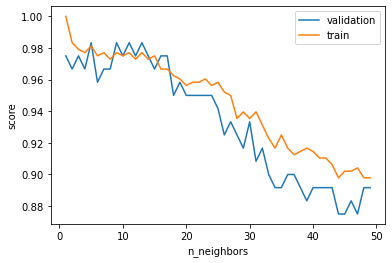

In [25]:
model = KNeighborsClassifier()
k = np.arange(1, 50, 1)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### 2.4. GridSearchCV <a class="anchor" id="2.4"></a>
Avec la validation curve, on test un hyperparamètre à la fois, mais ne réalité il en existe beaucoup d'autres.
* grid = **GridSearchCV**(model, param_grid, cv=...) : construit une grille de modèles avec toutes les combinaisons d'hyperparamètres présent dans **param_grid**. param_grid est un dictionnaire contenant en clé les hyperparamètres à tester, et en valeur, leur valeur.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [28]:
grid.best_score_ # on récupère la valeur du meilleur score

0.9833333333333334

In [29]:
grid.best_params_ # on récupère les paramètres optimaux

{'metric': 'euclidean', 'n_neighbors': 5}

In [30]:
model = grid.best_estimator_ # on injecte les meilleurs paramètres dans le model.

model.score(X_test, y_test) # Pour finir on test ce model sur les données X_test et y_test.
                            # Pour avoir un aperçu de ses performances réelles.

0.9333333333333333

### 2.5. Confusion Matrix <a class="anchor" id="2.5"></a>
* **confusion_matrix**(y_test, model.predict(X_test)) : autre manière de tester un model, montre les erreurs de classement.

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, model.predict(X_test))
# On obtient une matrice, avec en ligne et en colonne les classes.
# Hors de la diagonale sont représentés les erreurs de classement.

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

### 2.6. Learning curve <a class="anchor" id="2.6"></a>
les courbes d'apprentisages permettent de savoir si ajouter plus de données à notre model pourrait encore améliorer sa fiabilité.
* **learning_curve**() : représente la fiabilité du model en fonction de la quantité de données fournit.

In [33]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


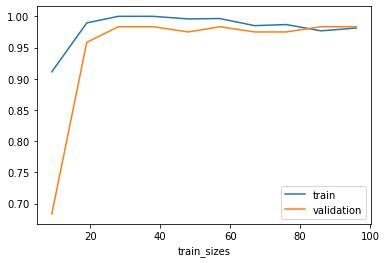

In [34]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [35]:
* [3](#3) : Preprocessing et pipelines
    * [3.1](#3.1) : Encodage
    * [3.2](#3.2) : Normalisation
    * [3.3](#3.3) : Polynomial Features
    * [3.4](#3.4) : Discretisation
    * [3.5](#3.5) : Pipelines

SyntaxError: unexpected EOF while parsing (<ipython-input-35-910d02b7e2db>, line 6)

# 3. Preprocessing <a class="anchor" id="3"></a>

On encode des données qualitatives et on normalise des données quantitatives.

### 3.1. Encodage et transformeurs <a class="anchor" id="3.1"></a>


Les **transformeurs** sont des classes très utiles permettant de transformer toutes les données futures de la même manière que les données qui ont servi à l'entrainement du modèle de machine learning. Deux méthodes importantes sont associées à ces transformateurs :
* **.fit** : développe une fonction de transformation en analysant les données du train set.
* **.transform** : applique la fonction de transformation sur toutes les données qu'on lui fournit.
* **.fit_transform** : combine les deux m'éthodes ci-dessus.

Un transformer associé à un estimator forme un **pipline**.

L'**encodage ordinal** associe chaque catégorie d'une variable à une valeur décimale unique.
* **LabelEncoder**() : permet de traiter une seule colonne (pour traiter les données y).
* **OrdinalEncoder**() : permet de traiter plusieurs colonnes (pour traiter les données X).

L'**encodage one hot** représente chaque catégorie de façon binaire dans une colonne qui lui est propre. Permet d'éviter les relations de supériorité ou d'infériorité entre des catégories définies par des valeurs décimales.
* **LabelBinarizer**() : encodage one hot sur une colonne.
    * **sparse_output**=True : affiche le résultat sous forme compressée
* **MultiLabelBinarizer**() :
* **OneHotEncoder**() : L'affichage sous forme compressée est le choix par défaut.
    * **sparse**=False : pour afficher la forme non compressée

#### 3.1.1. Encodage LabelEncoder et LabelBinarizer


In [36]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [37]:
# LabelEncoder
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [38]:
# LabelBinarizer
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

* **.inverse_transform**() : permet d'inverser la transformation pour décoder les données.

In [39]:
encoder.inverse_transform(np.array([0, 0, 2, 2]))

AxisError: axis 1 is out of bounds for array of dimension 1

#### 3.1.2. Encodage Ordinal et Encodage OneHot

In [40]:
# OrdinalEncoder
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [41]:
# OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X)

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

### 3.2. Normalisation <a class="anchor" id="3.2"></a>
La normalisation permet de mettre des données quantitative à une même échelle.

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [43]:
# Chargement d'un dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

#### 3.2.1. MinMaxScaler
* **MinMaxScaler**() : Transforme un jeux de variable pour faire en sorte que ces valeurs soient toutes comprises entre 0 et 1. Sensible aux valeurs abérantes.

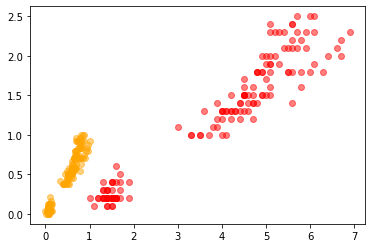

In [44]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, c="r") # données normal
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], alpha=0.5, c="orange") # données normalisés.

#### 3.2.2. StandardScaler
* **StandardScaler**() : centrage - réduction, la moyenne est nulle et l'écart type est égal à 1. Sensible aux valeurs abérantes.

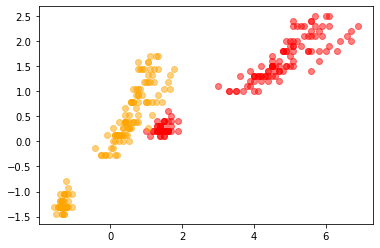

In [45]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, c="r") # données normal
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], alpha=0.5, c="orange") # données normalisés.

#### 3.2.3. RobustScaler
* **StandardScaler**() : transforme chaque variable X en étant très peu sensibles aux outliers.

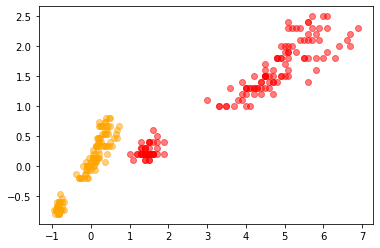

In [46]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, c="r") # données normal
plt.scatter(X_robust[:, 2], X_robust[:, 3], alpha=0.5, c="orange") # données normalisés.

### 3.3. Polynomial Features <a class="anchor" id="3.3"></a>
Permet de générer des fonctions polynomiales à partir d'un jeux de données.

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

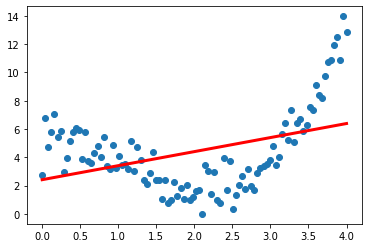

In [48]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
plt.show()

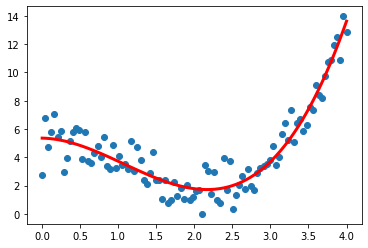

In [49]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
plt.show()

### 3.4. Discretisation <a class="anchor" id="3.4"></a>
La discretisation permet de découper une variable continue en plusieurs catégories.
* **Binarizer**(threshold=...) : convertit tout ce qui est en dessous du seuil en 0, et au dessus du seuil en 1.
* **KBinsDiscretizer**(n_bins=...) : découpe la variable en plus de deux catégories.

In [50]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [51]:
X = np.linspace(0, 5, 10).reshape((10, 1))

In [52]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [53]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# 4. Pipelines <a class="anchor" id="4"></a>

On encode des données qualitatives et on normalise des données quantitatives.

### 4.1. Pipelines basiques <a class="anchor" id="4.1"></a>

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [55]:
X = iris.data
y = iris.target

# Division du dataset en deux parties
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Voici la méthode "classique" pour écrire un modèle :

In [56]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

# Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

Mais il est possible d'être plus efficace en regroupant dans un pipline le transformeur et l'estimateur :
* **make_pipeline**() : permet de créer un pipline.

In [57]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

### 4.2. Pipelines et cross validation <a class="anchor" id="4.2"></a>
Les piplines sont très utiles pour faire de la cross-validation sur l'ensemble de la chaine de traitement des données.
* **GridSearchCV**(pipeline, params=..., cv=...) :
    * **params**={< composant >__< paramètre >:[...]}
    * **cv**=... : nombre de split pour la cross validation.

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Exemple d'utilisation de GridSearchCV
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [60]:
model = grid.best_estimator_

In [61]:
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

### 4.3. Pipelines avancés <a class="anchor" id="4.3"></a>

In [62]:
# Chargement d'un dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Ce dataset contient aussi bien des variables continues, que des variables discrètes ou des mots : il est hétérogène. Pour traiter ce dataset avec différents transformer il faut faire le trie dans nos différentes colonnes.
* **make_column_transformer**(transformer,  ["colonne1", "colonne2",...]) : permet d'appliquer un transformer sur des colonnes sélectionnées.
* **make_column_selector**(dtype_include=... / dtype_exclude=...) : sélectionne automatiquement toutes les colones avec un type de variable.

In [63]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

In [64]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

#### 4.3.1. Manière simple de procéder

In [65]:
# Manière la plus simple de procéder :
transformer = make_column_transformer((StandardScaler(), ["age", "fare"]))
transformer.fit_transform(X)
model = make_pipeline(transformer, SGDClassifier())

#### 4.3.2. Manière plus puissante de procéder

In [66]:
# Manière plus puissante de procéder :

# 1. On sépare les colonnes en 2 listes selon leur type (quantitatif ou qualitatif) :
numerical_features = ["pclass", "age", "fare"]
categorical_features = ["sex", "deck", "alone"]
# ou :
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

# 2. On crée un pipeline pour chaque liste de features :
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

# 3. On assemble les 2 pipelines dans make_column_transformer :
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                      (categorical_pipeline, categorical_features))

# 4. Création du pipline final
model = make_pipeline(preprocessor, SGDClassifier())

# 5. Entrainement et utilisation du model
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C7B49D58B0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

#### 4.3.3. Feature Union
* **make_union**() : permet de créer des pipliles parallèles. les résultats sont concaténés à la sortie du transformer. 

In [67]:
from sklearn.pipeline import make_union

In [68]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

In [69]:
numerical_features = X[["age", "fare"]]

In [70]:
pipeline = make_union(StandardScaler(), Binarizer())
# En effectuant un fit_transform sur nos données on obtient alors 4 colonnes, 2 pour chaque transfromer.

# 5. Feature Selection <a class="anchor" id="5"></a>
Le feature Selection consiste en trouver les variables les plus utiles pour notre modèle de machine learning. En effet des variables non utiles peuvent impacter négativement la performance du modèle.

* **.get_support**() : retourne un tableau booléen indiquant quelle colonne est supprimée. 

### 5.1. Variance Threshold <a class="anchor" id="5.1"></a>
Elimine les variables dont les variances sont inférieures à un certain seuil. Une variable qui ne varie pas est inutile.
* **VarianceThreshold**(threshold=0.2) 


In [71]:
from sklearn.feature_selection import VarianceThreshold

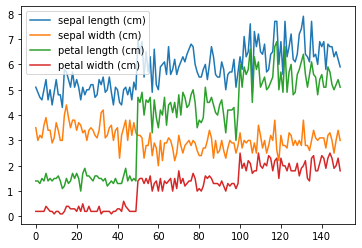

In [72]:
# Importation d'un dataset

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [73]:
# On calcule la variance de chacune des variables
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [74]:
# On crée un objet selector qui va être notre transformeur.
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)

VarianceThreshold(threshold=0.2)

In [75]:
selector.get_support()
# La seconde colonne, sepal width, est supprimé.

array([ True, False,  True,  True])

In [76]:
# On peut utiliser selectir.get_support() comme un masque booléen
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### 5.2. SelectKBest <a class="anchor" id="5.2"></a>
Ce transformer sélectionne les K variables X dont le score du test de dépendance avec Y est le plus élevé. Pour la **classification** on utilise un test de **chi2** ou d'**ANOVA** et pour la **régression** on utilise un test de **Pearson**.
* **SelectKBest**(<test de dépendance>, k=...) 
* **chi2**(X, y) : retourne deux tableaux : dans le premier le score du test chi2 (plus il est élevé, et plus il ya une dépendance entre X et y), et dans le second tableau on retrouve les p-values.
* **f_classif**(X, y) 
* **f_regression**(X, y) 

In [77]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [78]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [79]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

In [80]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

### 5.3. Recursive feature Elimination <a class="anchor" id="5.3"></a>
RFE et RFECV éliminent les variables les moins importantes de de façon récursive. Un estimateur est entrainé plusieurs fois, après chaque entrainement, des features sont éliminés sur la base de des coeffcients les plus faible de l'estimateur.
* **RFECV**(estimateur, step, min_features_to_select=..., cv=...) :

In [81]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [82]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y)
print(selector.ranking_) # Classement final des variables
print(selector.grid_scores_) # Score à chaque itération

[2 1 1 1]
[0.8        0.84666667 0.77333333]


In [83]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### 5.4. SelectFromModel <a class="anchor" id="5.4"></a>
On pré-entraine un estimateur et on examine ses coefficients pour voir quelles sont les variables importantes. Compatible uniquement avec les estimateurs qui développent des coefficients (impossible avec le K-nearests Neighbour).

In [84]:
from sklearn.feature_selection import SelectFromModel

In [85]:
X = iris.data
y = iris.target
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit(X, y)
selector.get_support()

array([False, False,  True,  True])

In [86]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

# 6. Apprentissage Non-Supervisé <a class="anchor" id="6"></a>
Dans l'apprentisage non-supervisé, on ne fournit plus de données y à la machine. Elle doit reconnaître elle même des structures dans les données X.

### 6.1. K-Means Clustering <a class="anchor" id="6.1"></a>
Le **K-Means** clustering regroupe les données selon leur ressemblance. Il fonctionne de la manière suivante : On place K "centroïdes" aléatoirement dans notre dataset (les barycentres des futurs clusters), ensuite on affecte chaque point du data set au centroïde le plus proche, ce qui donne 3 clusteur. Puis on déplace chaque centroïde au milieu du clusteur crée, puis on recommence jusqu'à ce que les centroïdes convergent vers une position d'équilibre.
Pour éviter que les centroïdes se retrouvent bloqués dans de mauvaises position, on lance plusieurs fois le K-means avec des positions de départ différentes. La solution retenue est celle qui minimise la somme des distances entre les points d'un cluster et son centre.

En résumé le K-means cherche la position des centres qui minimise la distance entre les points d'un cluster et le centre de ce dernier. Ce qui correspond à minimiser la variance des clusters.
* **Kmeans**() :
    * **n_clusters**=... : nombre K de clusters
    * **n_init**=... : nombre d'éxécutions
    * **max_iters**=... : nombre d'itérations
    * **init**=... : type d'initialisation (K-means++ de base)
    
Méthodes :
* **Fit**(X) : exécute le K-means
* **Predict**(X) : centroid le plus proche de X
* **Score**(X) : calcul de l'inertia (négatif) (somme des distances entre les points d'un clusteur et le centroïde)

Attributs :
* **.cluster_centers_** : position des centroïdes
* **.Labels_**(X) : équivalent de prédict
* **.Inertia_**(X) : calcul de l'inertia (positif)

In [87]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

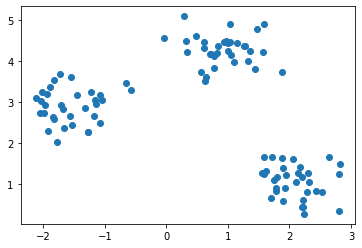

In [88]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

-30.870531280140664

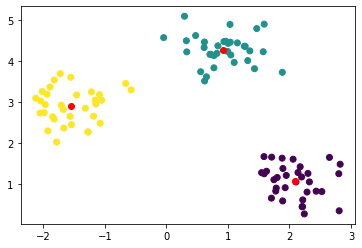

In [89]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

#### Elbow method
La "Elbow method"permet de déterminer le nombre optimal de clusteur dans un jeux de données. Il s'agit d'une zone coudée dans le graphique inertia en fonction du nombre de clusteur.

C:\Users\thide\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cout du modele (Inertia)')

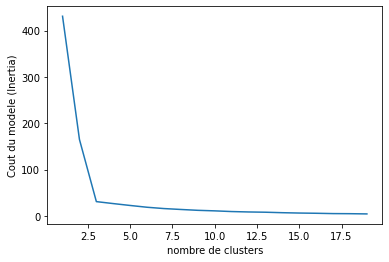

In [90]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

### 6.2. Detection d'anomalies avec Isolation Forest <a class="anchor" id="6.2"></a>
Dans un dataset on effectue une série de splits aléatoires, et on compte el nombre de splits qu'il faut effectuer pour pouvoir isoler nos échantillons. Plus ce nombre est petit et plus il y a de chance qu'il y ait des anomalies. 
* **IsolationForest**(contamination=...) : la contamination représente le pourcentage d'outlier à enlever du dataset.
* **.predict** : retourne un tableau de 1 et de -1. Les 1 sont les données normales et les -1 des outliers.

In [91]:
from sklearn.ensemble import IsolationForest

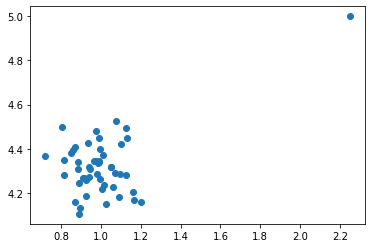

In [92]:
# Création d'un jeux de données
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])
plt.show()

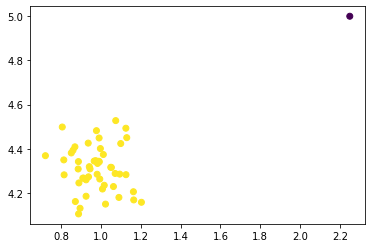

In [93]:
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))
plt.show()

#### Exemple d'applications : Digits outliers
Le dataset digits contient des images représentant des nombres de 0 à 9. On cherche à enlever les nombres les plus mals écrits.

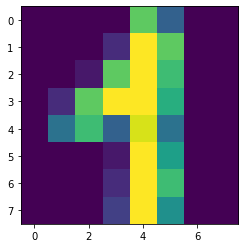

In [135]:
# Chargement du dataset
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[42])

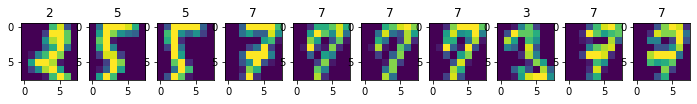

In [95]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)

# outliers est un tableau booléen avec des True à la place de -1.
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

### 6.3. PCA : Reduction de dimension <a class="anchor" id="6.3"></a>
Le principe est de réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension (avec moins de variables). La PCA projette nos données sur des axes appelés composantes principales, en cherchant à minimiser la distance entre nos points et leurs projections. On préserve au maximum la variance de nos données.
* **PCA**(n_components=...) : n_components correspond au nombre de dimensions souhaitées

Le nombre de dimensions souhaitées est de 2 pour une projection 2D et de 3 pour une projection 3D. Si on veut comprésser nos données il faut choisir un nombre de dimensions tel que 99 à 95% de la variance initial est conservée.

In [124]:
from sklearn.decomposition import PCA

In [125]:
X.shape # X contient initialement 64 variables, donc 64 dimensions.

(1797, 64)

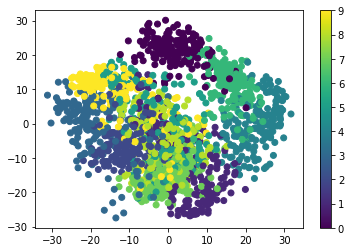

In [136]:
# Création du modèle
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

# Visualisation de nos données projettés sur deux axes.
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()
plt.show()

#### Compression d'un dataset
La compression d'un dataset peut permettre d'accelérer l'apprentisage de la machine tout en préservant entre 95 et 99% de la variance de notre dataset.
* **.explained_variance_ratio_** : indique le pourcentage de variance conservé par chacune des composantes.

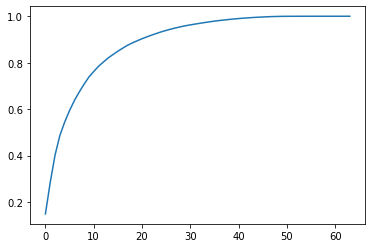

In [148]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

# On représente la somme cumulé du explained_variance_ratio_ en fonction du nombre de composante principale.
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

In [149]:
variances = model.explained_variance_ratio_
np.argmax(np.cumsum(variances) > 0.99)

40

On peut ensuite injecter cette valeur de n_components idéal dans notre PCA

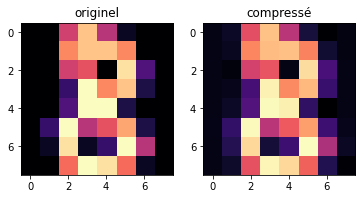

In [172]:
# Pour visualiser les effets de la compression
model = PCA(n_components=0.99)
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[8,:].reshape((8,8)), cmap='magma')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[8,:].reshape((8,8)), cmap='magma')
plt.title('compressé')
plt.show()

# 7. Ensemble Learning <a class="anchor" id="7"></a>
L'ensemble learning consiste en l'amélioration d'une prédiction par l'utilisation de plusieurs modèles.

In [184]:
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

In [209]:
# Création d'un template de figure
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.5)
    plt.title(clf)
    
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8, edgecolors='k')
    plt.show()

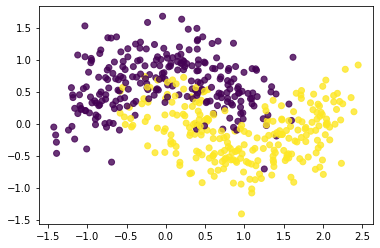

In [210]:
# Génération d'un dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7.1. Voting Classifier <a class="anchor" id="7.1"></a>
* **VotingClassifier**([("surnom_model", model), (...)]) : aggrège les résultats d'une "foule" de modèle. Ce n'est pas une méthode d'Ensemble Learning très efficace.

In [186]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [190]:
# On commence par définir plusieurs modèles.
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

# On construit le VotingClassifier à partir des 3 autres modèles
model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


### 7.2. Bagging <a class="anchor" id="7.2"></a>
Le Bagging consiste en la création de plusieurs copies du même modèle, en entraînant chaque copie sur une partie aléatoire du dataset. Ces parties aléatoires de dataset sont crée avec une méthode de boostrapping (tirage au sort puis remise des échantillons). 

* **BaggingClassifier**(base_estimator=..., n_estimators=...)
* **RandomForestClassifier**(n_estimators=...): 

In [173]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [217]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8866666666666667

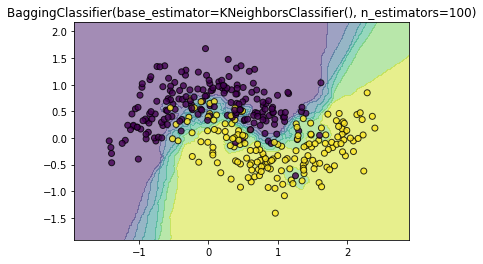

In [218]:
plot_decision_boundary(model, X_train, y_train)

In [213]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

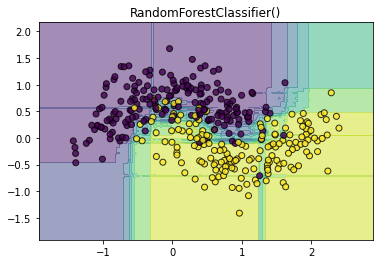

In [214]:
plot_decision_boundary(model, X_train, y_train)

### 7.3. Boosting <a class="anchor" id="7.3"></a>
On utilise des modèles faibles s'entrainant sur un même dataset, mais chaque nouveau modèle prend en compte les erreurs du modèle précédent pour s'améliorer.
* **AdaBoostClassifier**(n_estimators=...) :
* **GradientBoostingClassifier**(n_estimators=...) :

In [174]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [219]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

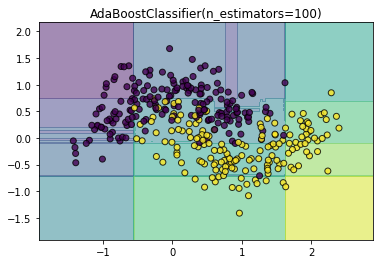

In [220]:
plot_decision_boundary(model, X_train, y_train)

In [221]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

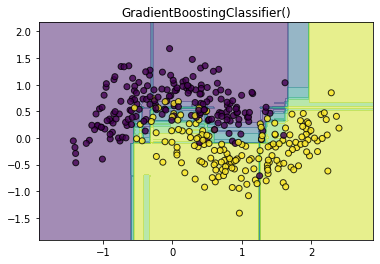

In [222]:
plot_decision_boundary(model, X_train, y_train)

### 7.4. Stacking <a class="anchor" id="7.4"></a>
Au lieu de rassembler les prédictions de chaque modèle, on demande à un dernier estimateur d'apprendre à prédire le résultat final en fonction de ces prédictions.
* **StackingClassifier**([("surnom_model", model), (...)]) :

In [223]:
from sklearn.ensemble import StackingClassifier

In [224]:
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                             final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

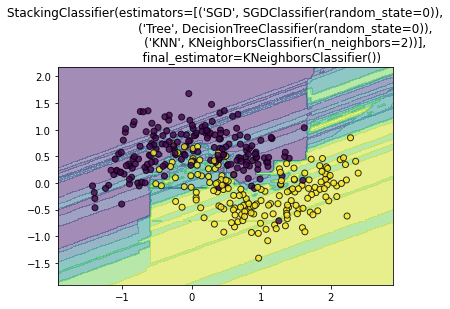

In [225]:
plot_decision_boundary(model, X_train, y_train)